# Tarea 1 Modulo 1 - Analisis de Datos 2022-1


---

# 2. Asignacion - Pandas, Pandas, Pandas. ¡La inmersion en los datos continua! Heroes de Pymoli

In [1]:
import pandas as pd

Load data

In [2]:
data = pd.read_csv('data/purchase_data.csv', sep=',')
data[['Item ID','Age']] = data[['Item ID','Age']].astype(int)
print(data.shape)
print(data.dtypes)
pd.concat([data.head(), data.tail()])

(780, 7)
Purchase ID      int64
SN              object
Age              int32
Gender          object
Item ID          int32
Item Name       object
Price          float64
dtype: object


,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,101,Final Critic,4.19
779,779,Ennrian78,24,Male,50,Dawn,4.60


validar si tiene missings

In [3]:
data.isnull().sum()

Purchase ID    0
SN             0
Age            0
Gender         0
Item ID        0
Item Name      0
Price          0
dtype: int64

## 2.1. numero de jugadores

In [4]:
print("Son ", len(data['SN'].drop_duplicates()), " jugadores.")

Son  576  jugadores.


## 2.2. Analisis de compra (total)

### 2.2.1 Numero de articulos unicos

In [5]:
print(f"""Numero de ids de items={len(data['Item ID'].drop_duplicates())}, numero de nombres de items={len(data['Item Name'].drop_duplicates())}""")

Numero de ids de items=183, numero de nombres de items=179


mas de un **Item Name** con diferentes IDs.

In [6]:
items_duplicados = data.groupby(['Item Name'],dropna=False)['Item ID'].nunique()[data.groupby(['Item Name'],dropna=False)['Item ID'].nunique()>1]
items_duplicados = data[data['Item Name'].isin(items_duplicados.index)].sort_values('Item Name')
items_duplicados

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
121,121,Ilosia37,23,Male,1,Crucifer,3.26
251,251,Iasur80,22,Male,23,Crucifer,1.99
697,697,Tyaelistidru84,19,Female,1,Crucifer,3.26
454,454,Lassimla92,25,Male,1,Crucifer,3.26
2,2,Ithergue48,24,Male,92,Final Critic,4.88
768,768,Assassasta79,38,Male,92,Final Critic,4.88
767,767,Ilmol66,8,Female,92,Final Critic,4.88
722,722,Ilarin91,22,Male,92,Final Critic,4.88
712,712,Lisilsa62,25,Male,92,Final Critic,4.88
774,774,Jiskjask80,11,Male,101,Final Critic,4.19


Se define que para el ejercicio el **Item Name** sera tenido en cuenta como identificador unico del articulo y se descartara el **ID**

### 2.2.2 Precio medio de compras

In [7]:
print("Precio medio de compra = ", data['Price'].mean())

Precio medio de compra =  3.0509871794871795


### 2.2.3 Numero total de compras

In [8]:
print("Numero total de compras =", len(data['Purchase ID'].drop_duplicates()))

Numero total de compras = 780


### 2.2.4 Ingresos totales

In [9]:
print("Ingresos totales = ",data['Price'].sum())

Ingresos totales =  2379.77


## 3. Datos demograficos y genero

In [10]:
df_gender = data.groupby('Gender',dropna=False)['SN'].nunique()
df_gender = df_gender.reset_index()
df_gender['%_SN'] = df_gender['SN'] / df_gender['SN'].sum() # porcentajes del total
df_gender.columns = ['Sexo','Numero de Jugadores','% de Jugadores']
print("Distribucion de jugadores por sexo:")
df_gender

Distribucion de jugadores por sexo:


,Sexo,Numero de Jugadores,% de Jugadores
0,Female,81,0.140625
1,Male,484,0.840278
2,Other / Non-Disclosed,11,0.019097


## 2.4. Analisis de compras (genero)

In [11]:
dfg1 = data.groupby('Gender',dropna=False).agg(
                                        NumeroDeCompras=('Purchase ID','size')
                                        , PrecioMedio=('Price','mean')
                                        , ValorTotal=('Price','sum')
                                        , Personas=('SN','nunique')
                                    )
dfg1['CompraPersona'] = dfg1['ValorTotal'] / dfg1['Personas']
print("Distribucion por sexo:")
dfg1

Distribucion por sexo:


,NumeroDeCompras,PrecioMedio,ValorTotal,Personas,CompraPersona
Gender,,,,,
Female,113,3.203009,361.94,81,4.468395
Male,652,3.017853,1967.64,484,4.065372
Other / Non-Disclosed,15,3.346000,50.19,11,4.562727


## 2.5. Datos demograficos por edad

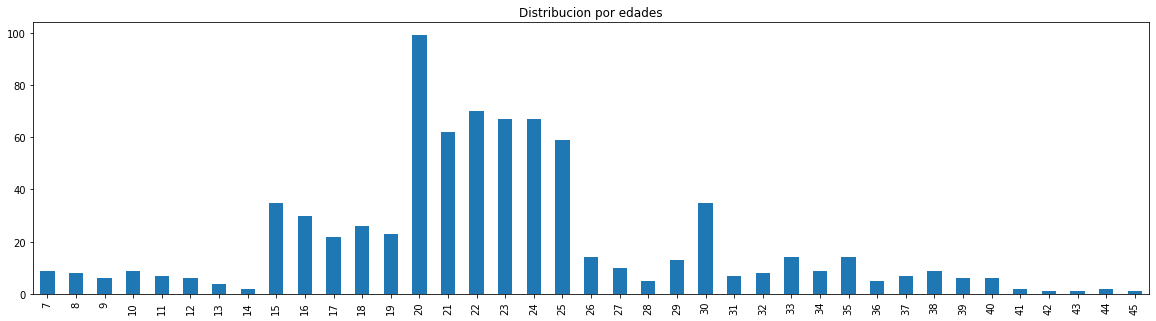

In [12]:
data['Age'].astype(int).value_counts().sort_index().plot.bar(figsize=(20,5),title="Distribucion por edades");

Genera grupos etareos por quinquenios (5 años)

In [13]:
for i in range(10,int(data['Age'].max())+1,5):
    if i==10:
        n = 1
        data.loc[data['Age']<i,'GrupoEtario'] = f'{n}. <10'
    n = n + 1
    data.loc[data['Age'].between(i,i+4),'GrupoEtario'] = f'{n}. {i} a {i+4}'
data.groupby('GrupoEtario',dropna=False).agg(Compras=('Purchase ID','size'), Personas=('SN','nunique'), EdadMin=('Age','min'), EdadMax=('Age','max'))

,Compras,Personas,EdadMin,EdadMax
GrupoEtario,,,,
1. <10,23,17,7,9
2. 10 a 14,28,22,10,14
3. 15 a 19,136,107,15,19
4. 20 a 24,365,258,20,24
5. 25 a 29,101,77,25,29
6. 30 a 34,73,52,30,34
7. 35 a 39,41,31,35,39
8. 40 a 44,12,11,40,44
9. 45 a 49,1,1,45,45


In [14]:
dfg2 = data.groupby('GrupoEtario',dropna=False).agg(
                                        RecuentoCompras=('Purchase ID','size')
                                        , PrecioMedio=('Price','mean')
                                        , ValorTotal=('Price','sum')
                                        , Personas=('SN','nunique')
                                    )
dfg2['TotalCompraPersona'] = dfg2['ValorTotal'] / dfg2['Personas']
print("Distribucion por grupos etarios:")
dfg2

Distribucion por grupos etarios:


,RecuentoCompras,PrecioMedio,ValorTotal,Personas,TotalCompraPersona
GrupoEtario,,,,,
1. <10,23,3.353478,77.13,17,4.537059
2. 10 a 14,28,2.956429,82.78,22,3.762727
3. 15 a 19,136,3.035956,412.89,107,3.858785
4. 20 a 24,365,3.052219,1114.06,258,4.318062
5. 25 a 29,101,2.900990,293.00,77,3.805195
6. 30 a 34,73,2.931507,214.00,52,4.115385
7. 35 a 39,41,3.601707,147.67,31,4.763548
8. 40 a 44,12,3.045000,36.54,11,3.321818
9. 45 a 49,1,1.700000,1.70,1,1.700000


## 2.6. Los que mas gastan

In [15]:
dfg3 = data.groupby('SN',dropna=False).agg(
                                        RecuentoCompras=('Purchase ID','size')
                                        , PrecioMedio=('Price','mean')
                                        , ValorTotal=('Price','sum')
                                    ).sort_values('ValorTotal', ascending=False).head(5)
print("los 5 jugadores que mas gastan en el juego por el valor total de la compra")
dfg3

los 5 jugadores que mas gastan en el juego por el valor total de la compra


,RecuentoCompras,PrecioMedio,ValorTotal
SN,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


## 2.7. Artıculos mas populares

In [16]:
dfg4 = data.groupby('Item Name',dropna=False).agg(
                                        RecuentoCompras=('Purchase ID','size')
                                        , PrecioMedio=('Price','mean')
                                        , ValorTotal=('Price','sum')
                                    ).sort_values('RecuentoCompras', ascending=False).head(5)
print("Los 5 artıculos mas populares segun el recuento de compras")
dfg4

Los 5 artıculos mas populares segun el recuento de compras


,RecuentoCompras,PrecioMedio,ValorTotal
Item Name,,,
Final Critic,13,4.614615,59.99
"Oathbreaker, Last Hope of the Breaking Storm",12,4.230000,50.76
Persuasion,9,3.221111,28.99
Nirvana,9,4.900000,44.10
"Extraction, Quickblade Of Trembling Hands",9,3.530000,31.77


## 2.8. Articulos mas rentables

In [17]:
# dfg5 = data.groupby(['Item ID','Item Name'],dropna=False).agg(
dfg5 = data.groupby('Item Name',dropna=False).agg(
                                        RecuentoCompras=('Purchase ID','size')
                                        , PrecioMedio=('Price','mean')
                                        , ValorTotal=('Price','sum')
                                    ).sort_values('ValorTotal', ascending=False).head(5)
print("Los 5 artıculos mas rentables por el valor total de la compra")
dfg5

Los 5 artıculos mas rentables por el valor total de la compra


,RecuentoCompras,PrecioMedio,ValorTotal
Item Name,,,
Final Critic,13,4.614615,59.99
"Oathbreaker, Last Hope of the Breaking Storm",12,4.230000,50.76
Nirvana,9,4.900000,44.10
Fiery Glass Crusader,9,4.580000,41.22
Singed Scalpel,8,4.350000,34.80
